In [1]:
import prince
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [64]:
pd.set_option('max_columns', None)

In [98]:
ultimate_df = pd.read_csv('Data/Created Datasets/ALL_merge_truncate3.csv', index_col = 0)

In [111]:
ultimate_df = pd.read_csv('Data/KSI.csv')

In [65]:
ultimate_df.head()

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,DIVISION,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
0,-8.844611e+06,5.412414e+06,3387730,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,<Null>,Major Arterial,Toronto and East York,4,11,43.656345,-79.452490,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Driver,unknown,None,<Null>,South,"Automobile, Station Wagon",Turning Left,Failed to Yield Right of Way,Unknown,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1
1,-8.844611e+06,5.412414e+06,3387731,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,<Null>,Major Arterial,Toronto and East York,4,11,43.656345,-79.452490,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Pedestrian,65 to 69,Fatal,<Null>,North,Other,<Null>,<Null>,<Null>,Vehicle turns left while ped crosses with ROW ...,Crossing with right of way,Unknown,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),2
2,-8.816480e+06,5.434843e+06,3388101,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,<Null>,Major Arterial,Scarborough,25,42,43.801943,-79.199786,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Turning Movement,Motorcycle Driver,45 to 49,Fatal,<Null>,East,Motorcycle,Turning Right,Disobeyed Traffic Control,Unknown,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),3
3,-8.816480e+06,5.434843e+06,3388102,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,<Null>,Major Arterial,Scarborough,25,42,43.801943,-79.199786,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Turning Movement,Driver,unknown,None,<Null>,South,"Automobile, Station Wagon",Going Ahead,Driving Properly,Unknown,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),4
4,-8.822759e+06,5.424516e+06,3387793,892682,2006,2006/03/12 05:00:00+00,240,2,EGLINTON AVE E,COMMONWEALTH AVE,<Null>,Major Arterial,Scarborough,"21,20",41,43.734945,-79.256190,Mid-Block,<Null>,No Control,Clear,Dark,Dry,Fatal,Pedestrian Collisions,Driver,25 to 29,None,<Null>,West,"Automobile, Station Wagon",Going Ahead,Other,"Ability Impaired, Alcohol",<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),5


In [4]:
cols = ultimate_df[['DRIVACT', 'DRIVCOND']]

In [9]:
cols = cols[~(cols['DRIVACT'] == '<Null>')]

In [92]:
mca = prince.MCA(random_state = 35)
mca.fit(cols)

MCA(random_state=35)

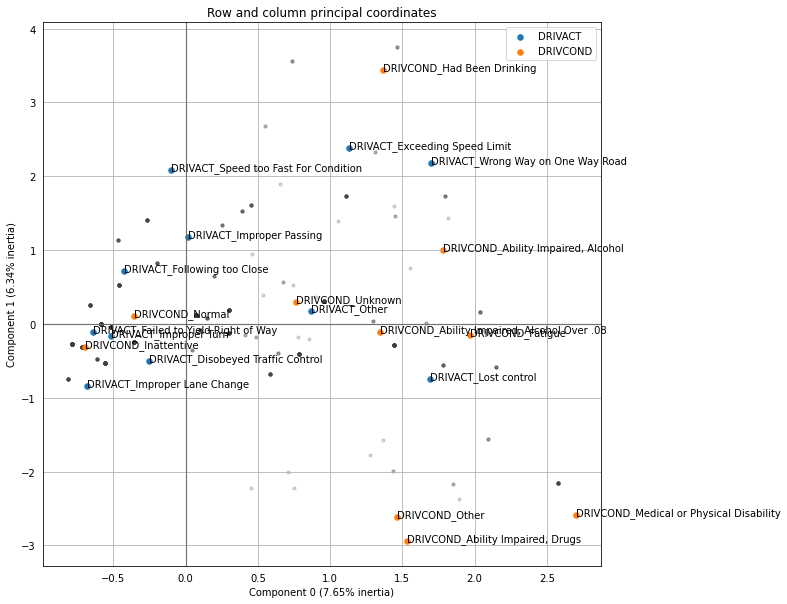

In [11]:
mca.plot_coordinates(cols,
                     row_points_alpha=.2,
                     figsize=(10, 10),
                     show_column_labels=True
                    );

In [126]:
cols = ultimate_df[['DRIVACT', 'DRIVCOND']]

In [127]:
cols = cols[((cols['DRIVACT'] != '<Null>') & (cols['DRIVCOND'] != '<Null>'))]

In [128]:
cols

,DRIVACT,DRIVCOND
0,Failed to Yield Right of Way,Unknown
2,Disobeyed Traffic Control,Unknown
3,Driving Properly,Unknown
4,Other,"Ability Impaired, Alcohol"
7,Failed to Yield Right of Way,"Ability Impaired, Alcohol Over .08"
...,...,...
16853,Driving Properly,Normal
16854,Improper Passing,Unknown
16856,Failed to Yield Right of Way,Inattentive
16857,Driving Properly,Normal


In [129]:
mca.fit(cols)

MCA(random_state=35)

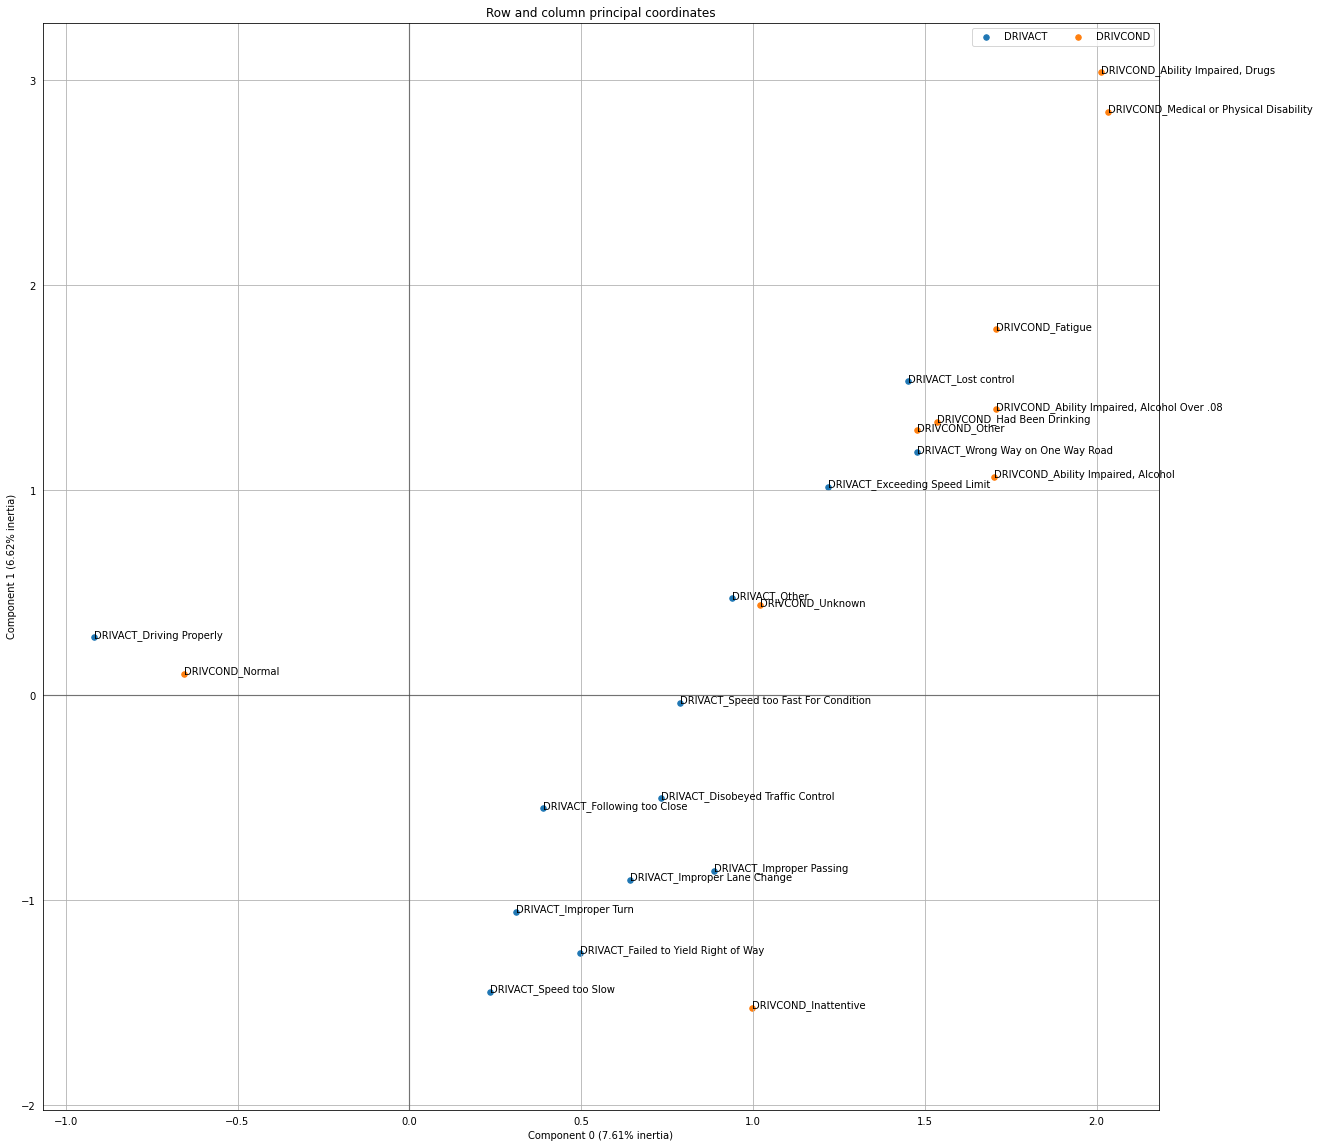

In [130]:
mca.plot_coordinates(cols,
                     row_points_alpha=0,
                     figsize=(20, 20),
                     show_column_labels=True,
                     legend_n_cols = 2
                    );